# Обучение с учителем

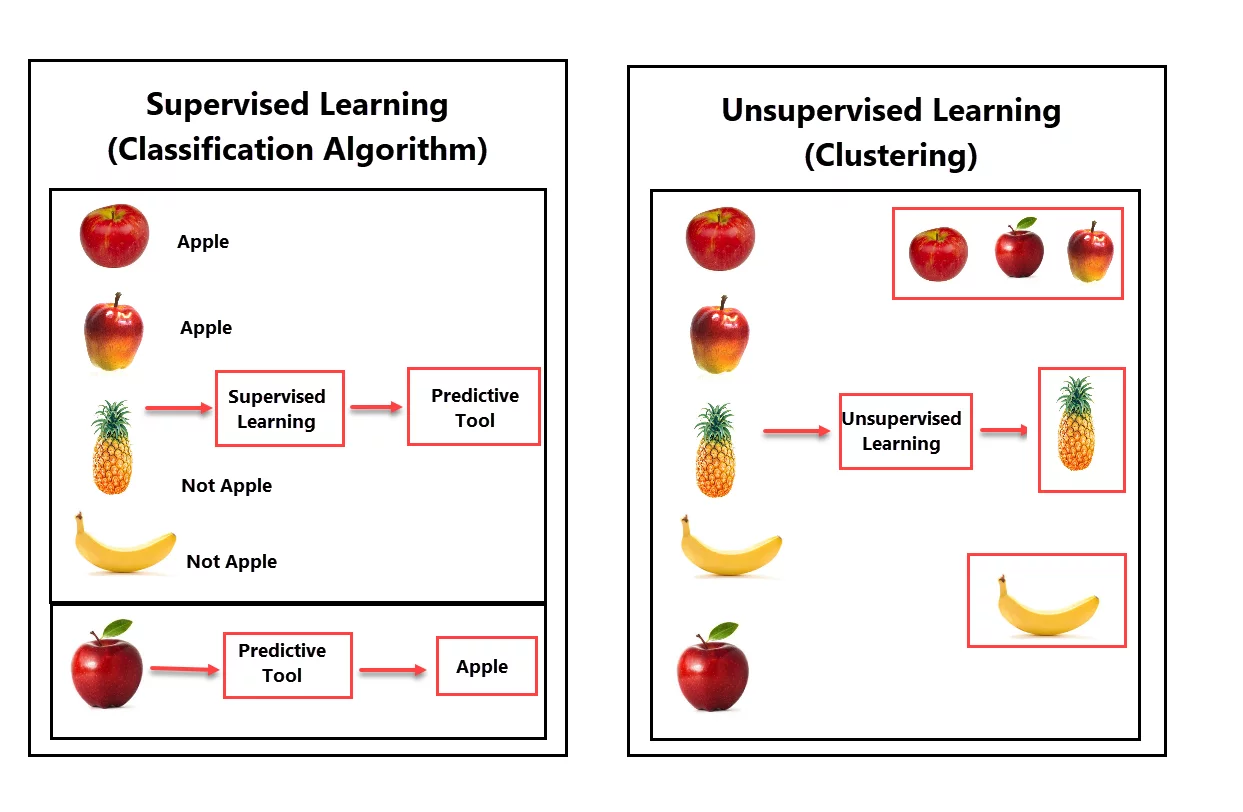

## Классификация

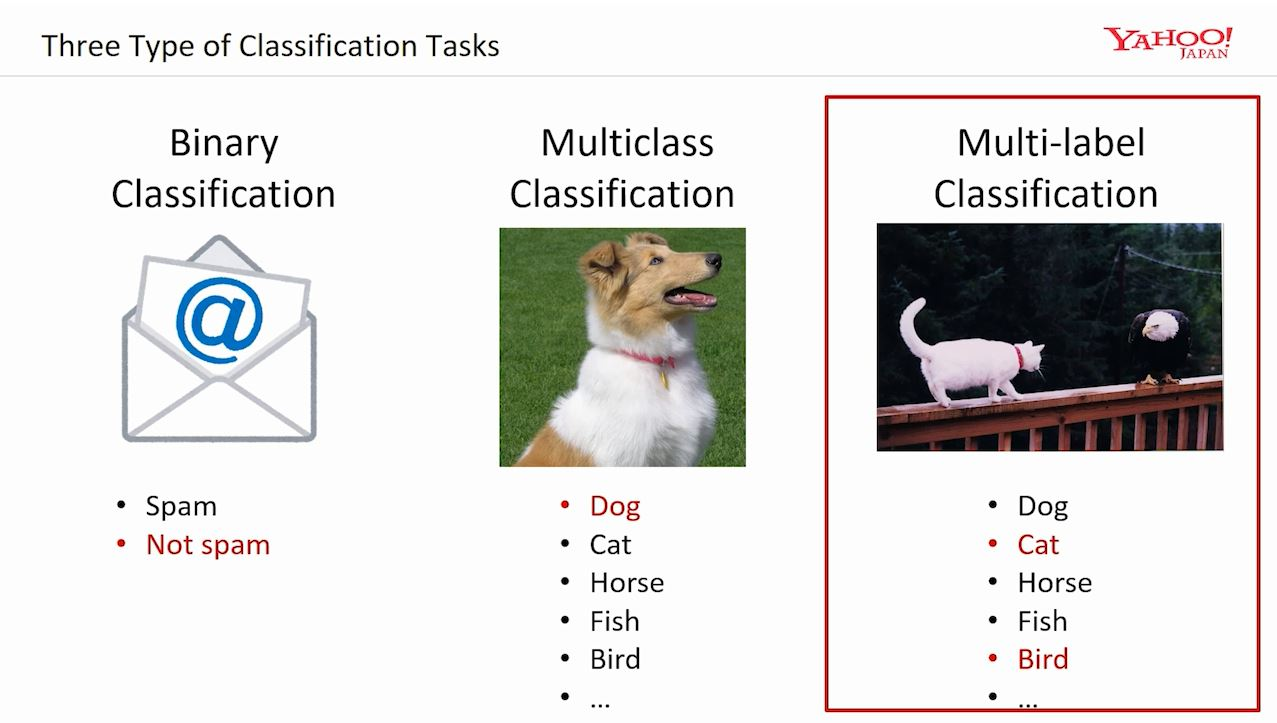

### Классические алгоритмы решающие эту задачу

- KNeighborsClassifier
- LogisticRegression
- SVM (SVC)
- DecisionTreeClassifier
- RandomForestClassifier
- GradientBoostingClassifier
- CatBoostClassifier
  
  ...

## Регрессия

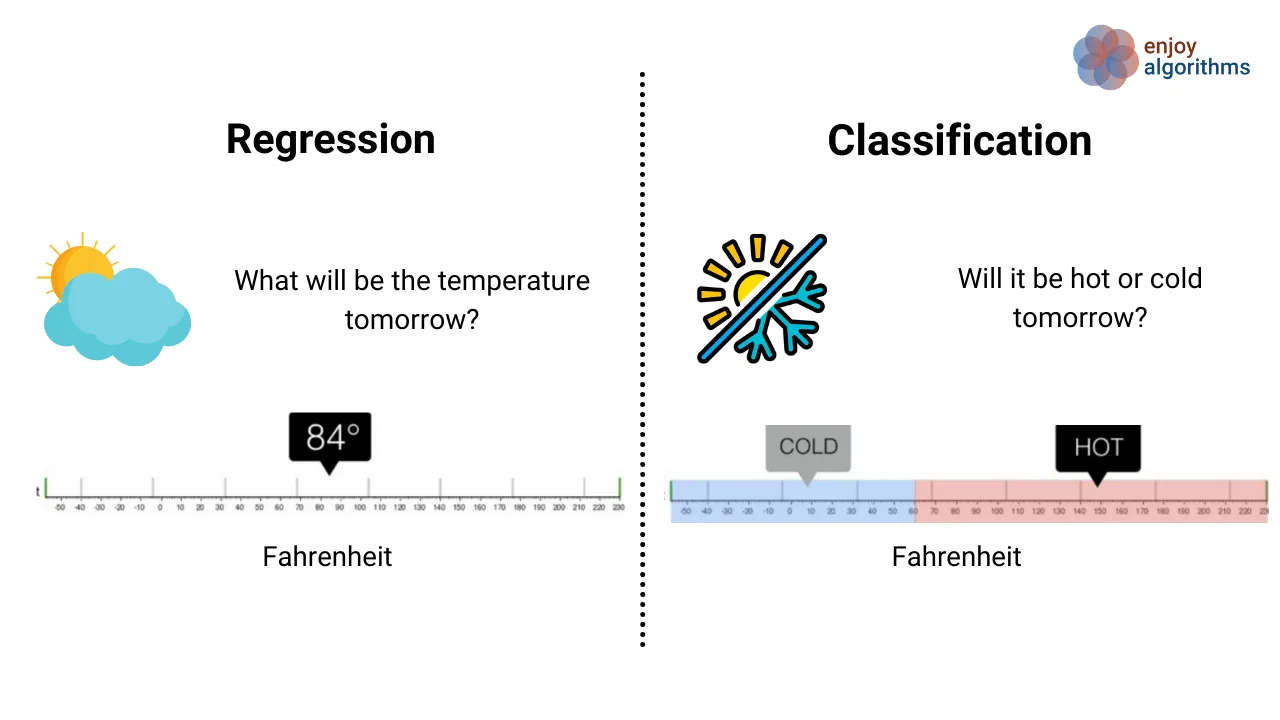

### Классические алгоритмы решающие эту задачу

- LinearRegression
- SVM (SVR)
- KNeighborsRegressor
- DecisionTreeRegressor
- RandomForestRegressor
- GradientBoostingRegressor
- CatBoostRegressor

  ...

## Алгоритм ближайшего соседа (KNeighbors)

#### 1. Выбрать ближайших соседей

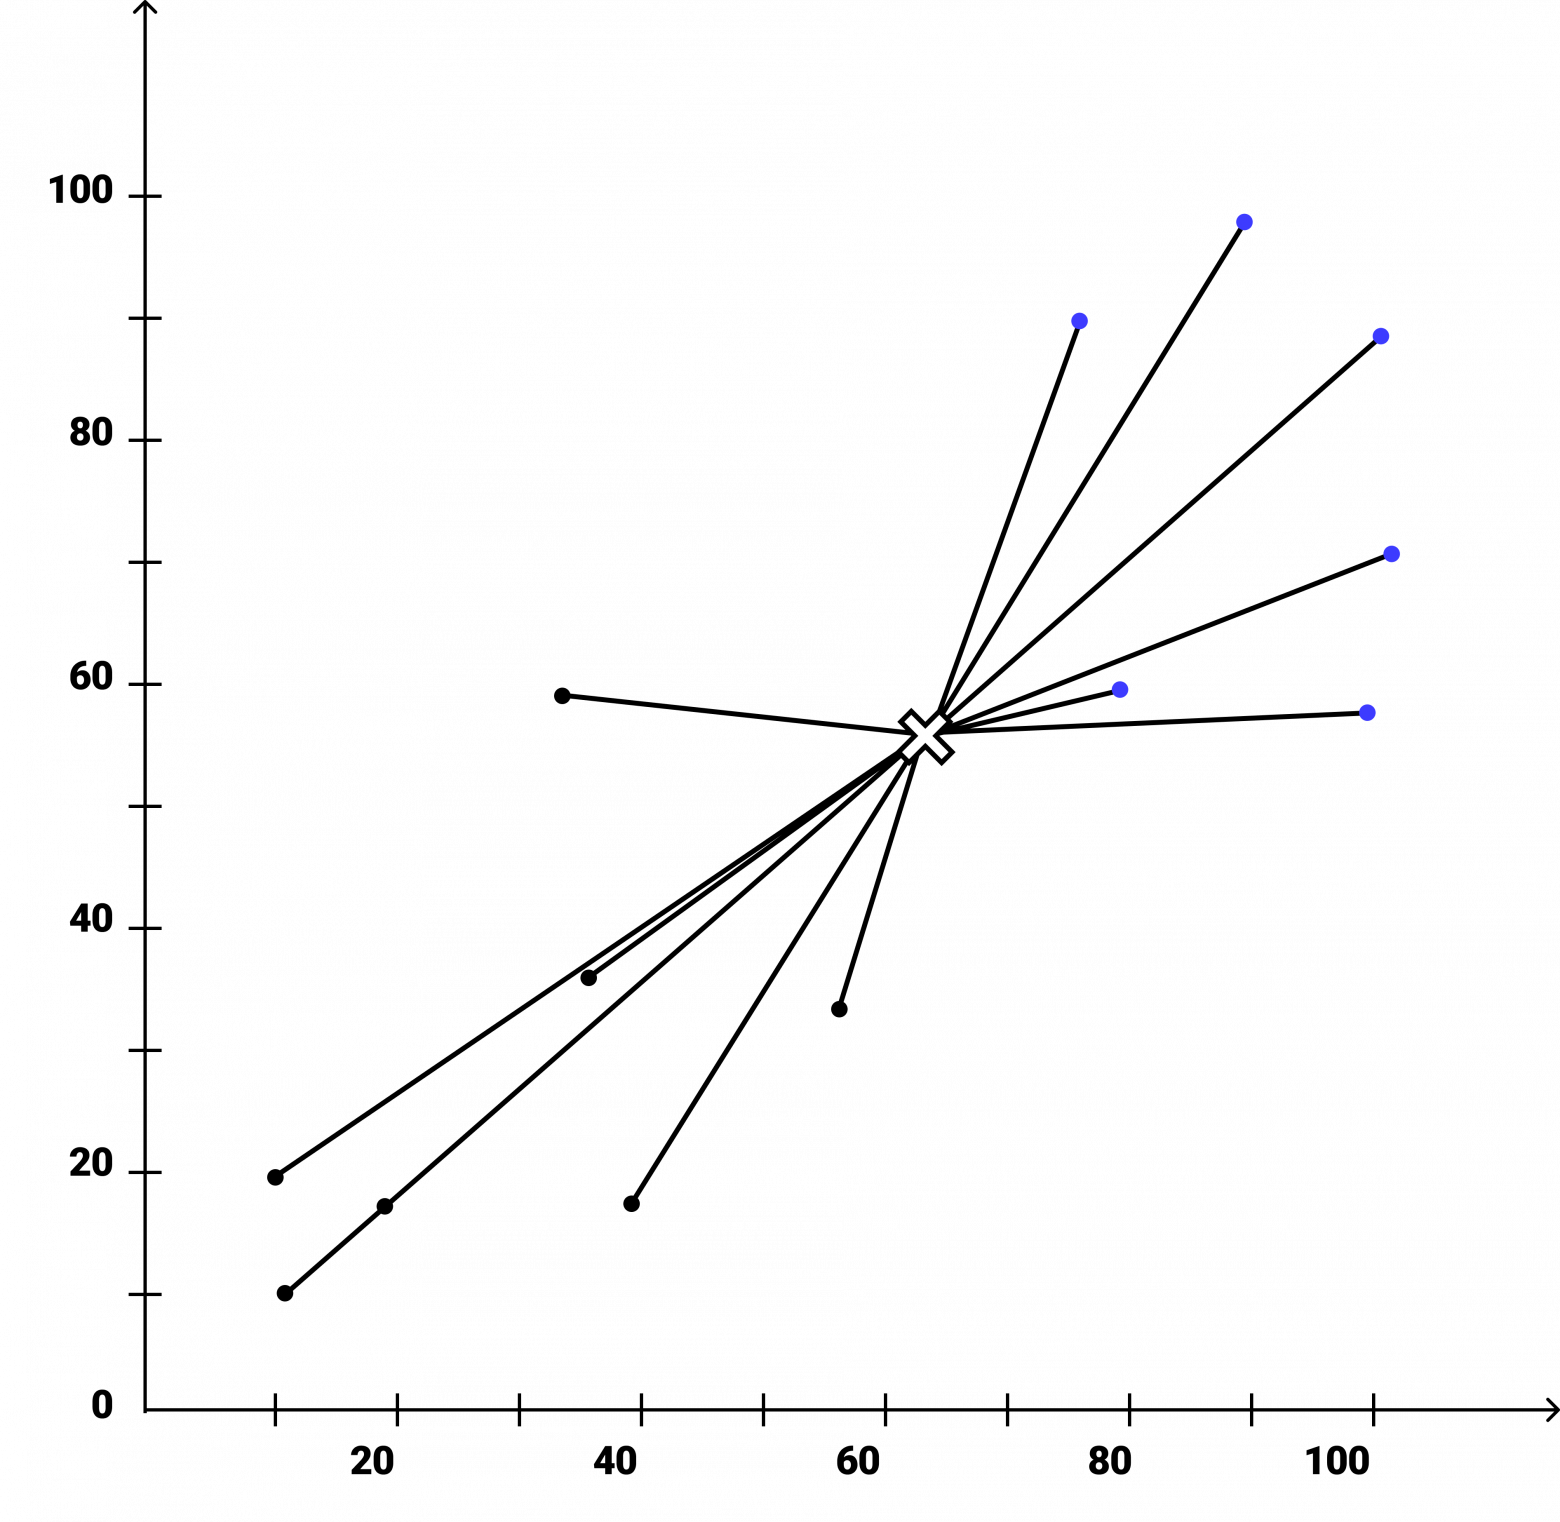

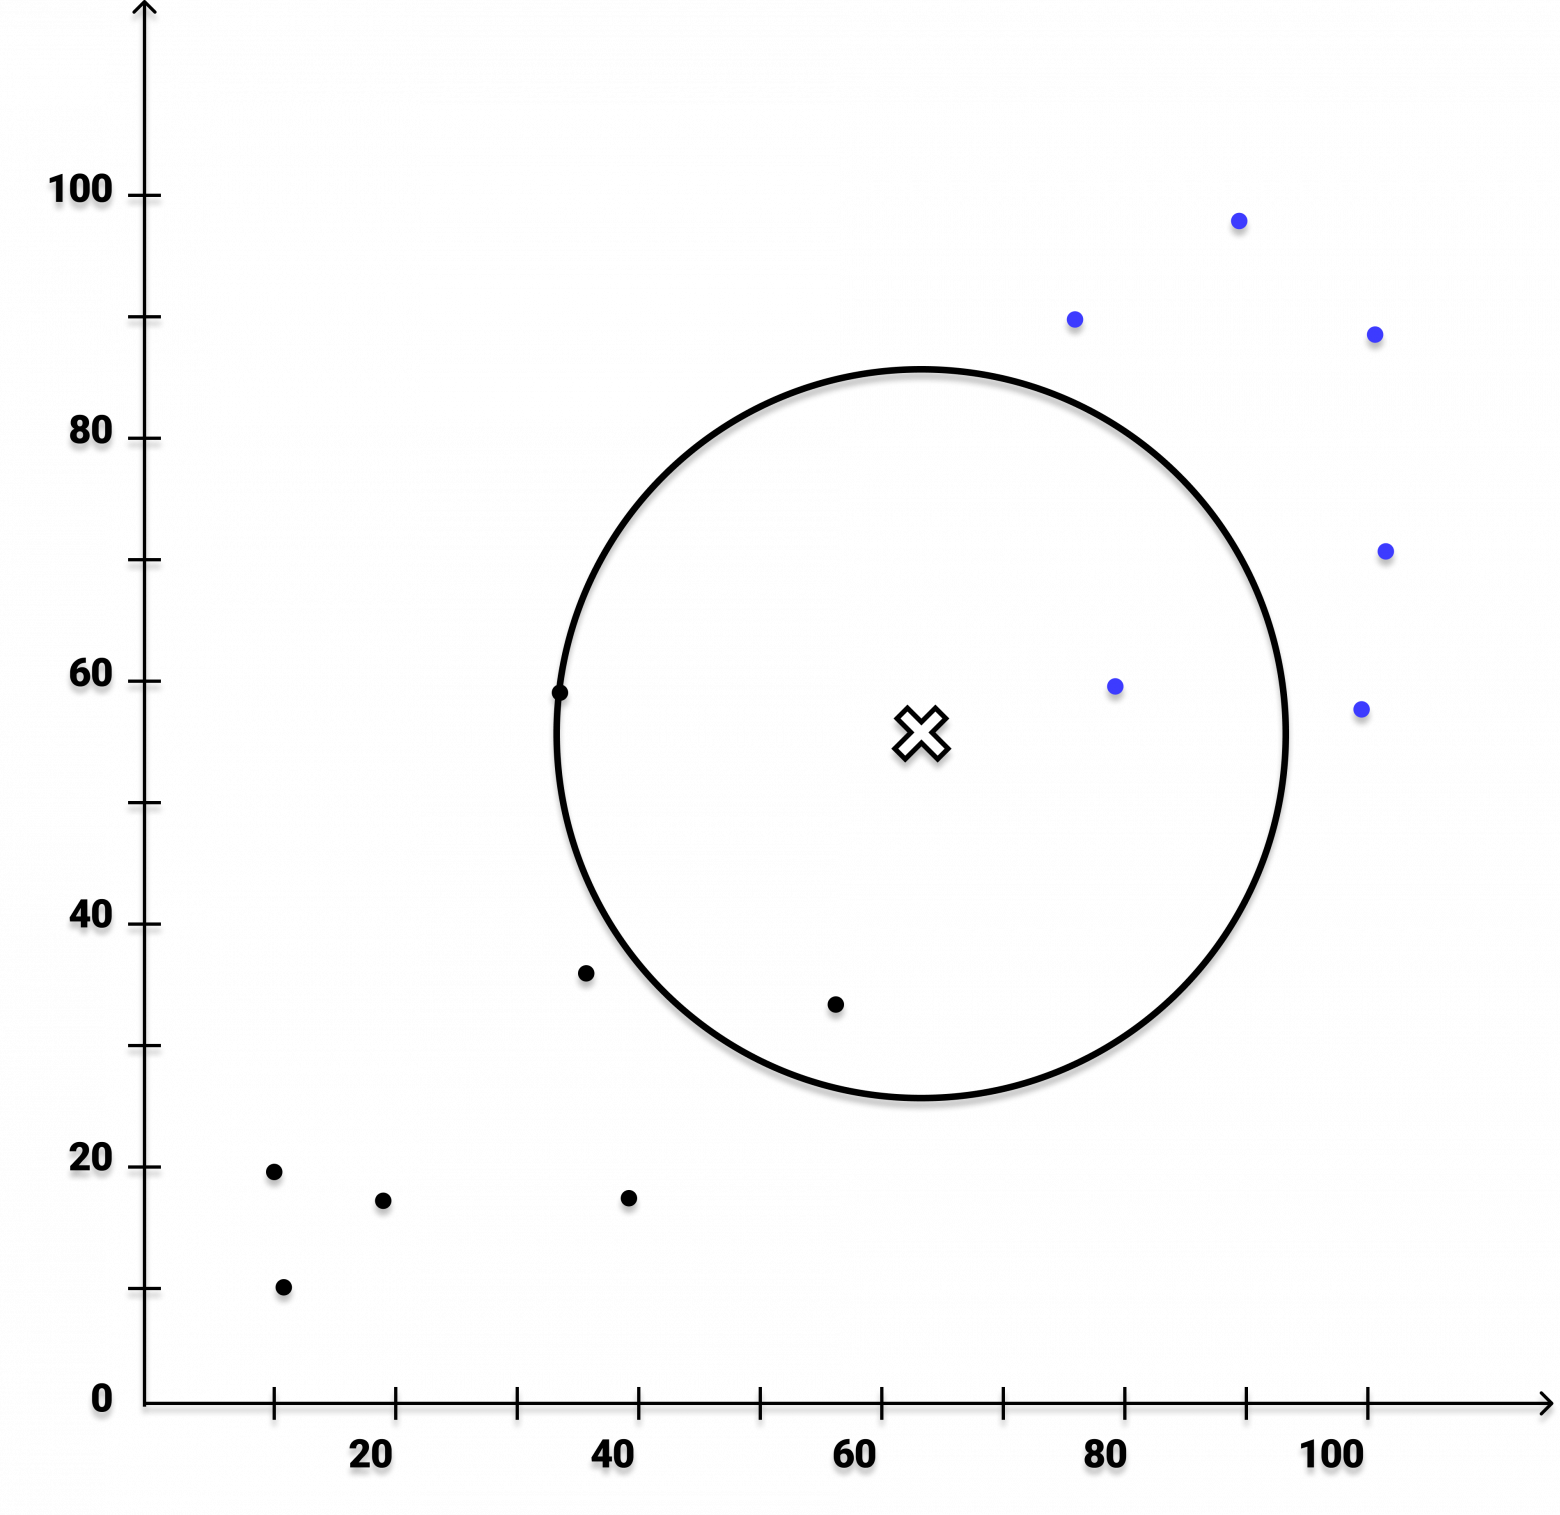

#### 2. Выбрать класс на основе частоты его встречаемости

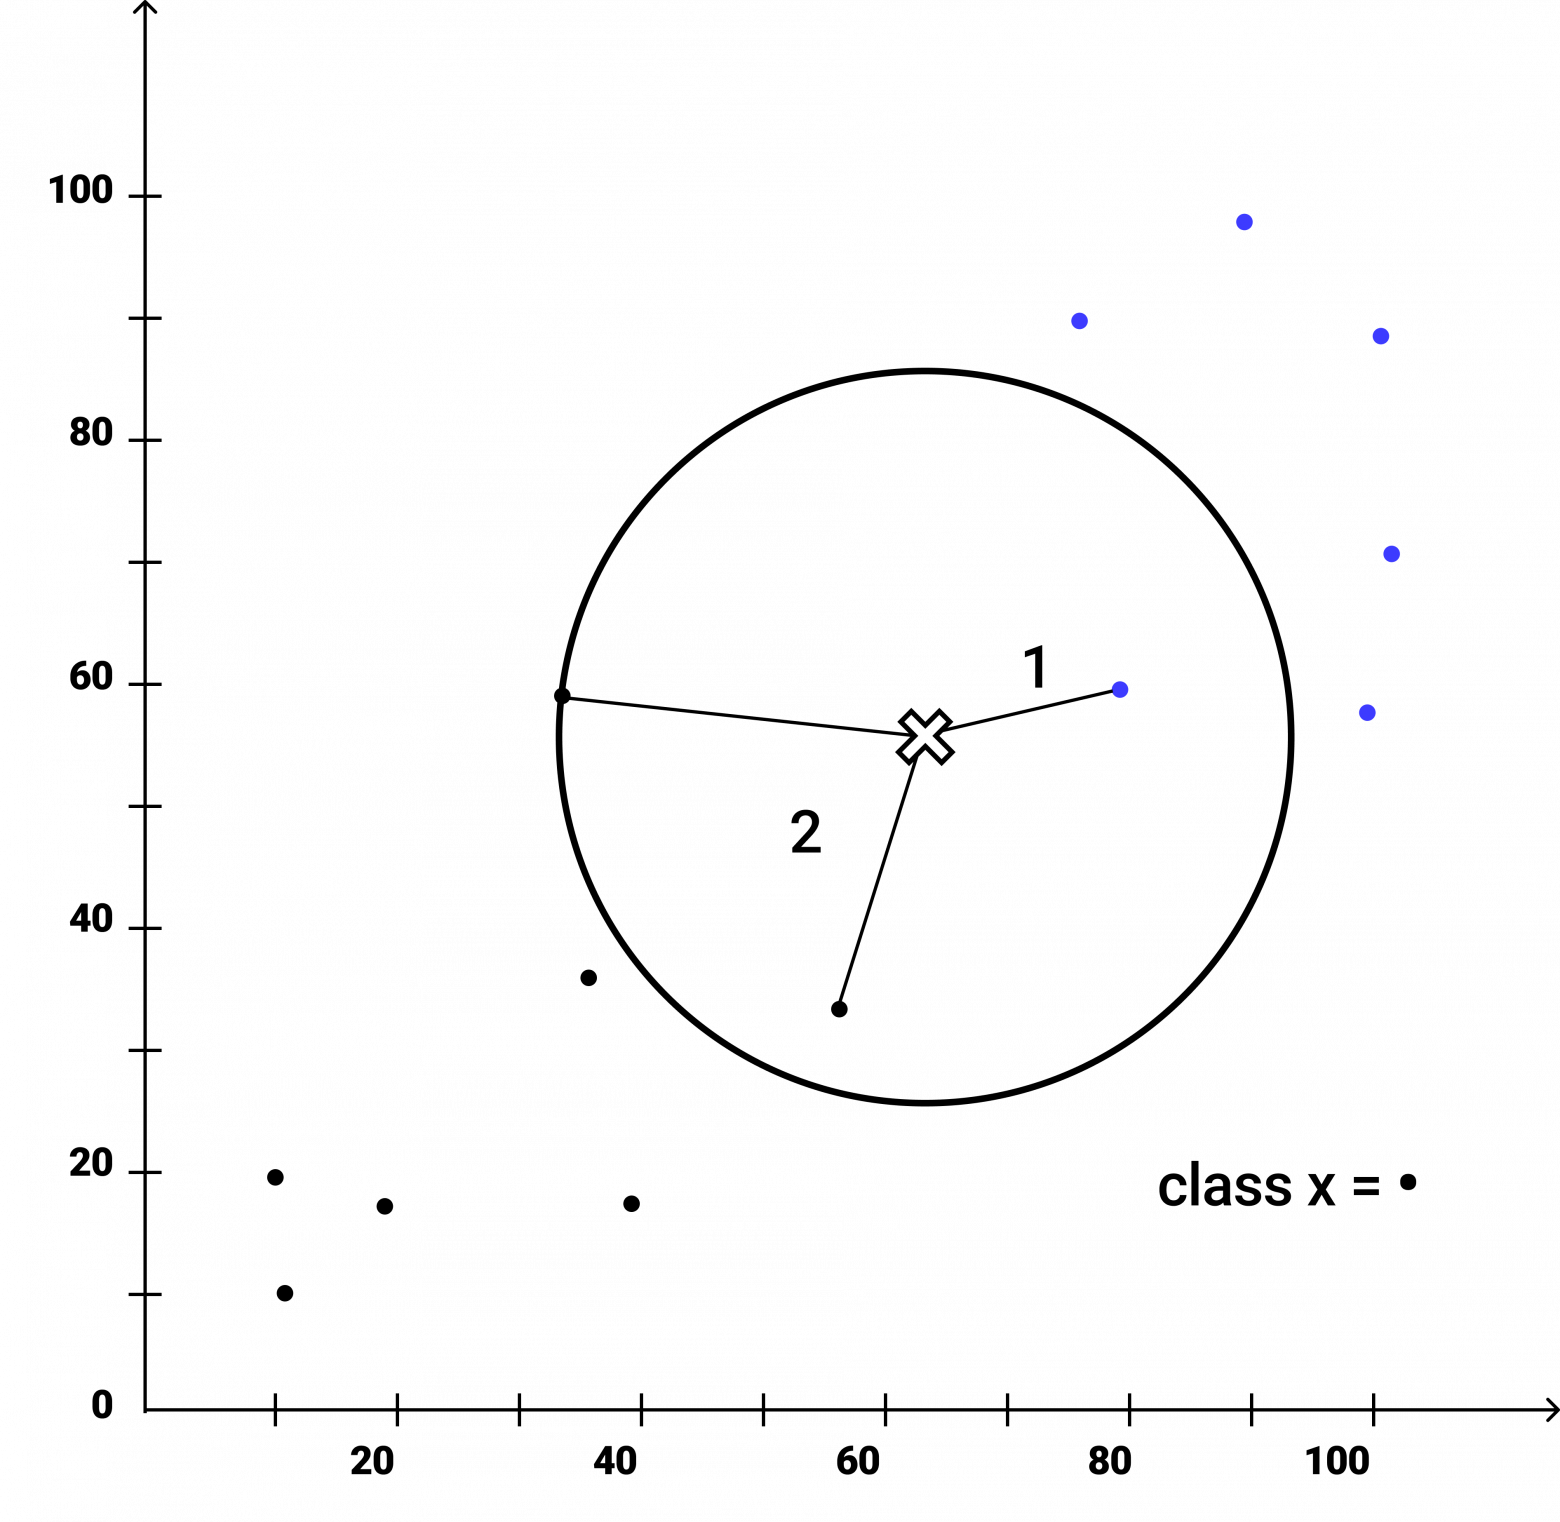

In [1]:
from sklearn.datasets import load_iris 
iris_dataset = load_iris()
iris_dataset.keys()


dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [2]:
iris_dataset['target_names']


array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [3]:
iris_dataset['feature_names']


['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [4]:
print(type(iris_dataset['data'])) 
iris_dataset['data'].shape

<class 'numpy.ndarray'>


(150, 4)

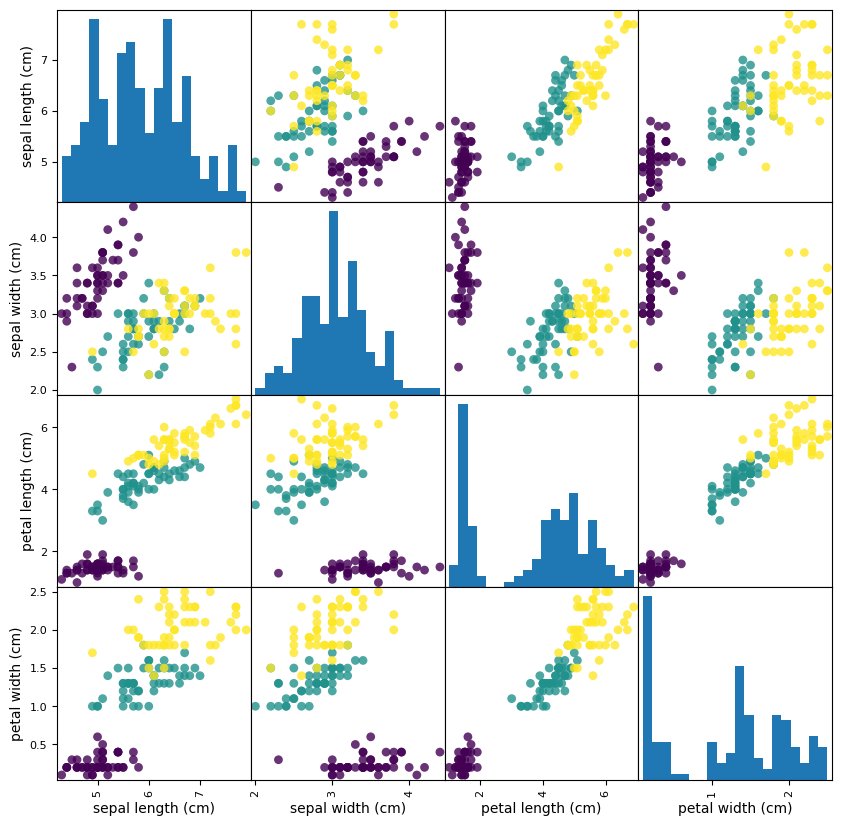

In [61]:
import pandas as pd

iris_dataframe = pd.DataFrame(iris_dataset['data'], columns=iris_dataset.feature_names)
scat_mtrx = pd.plotting.scatter_matrix(iris_dataframe, c=iris_dataset['target'], figsize=(10, 10), marker='o',
                                       hist_kwds={'bins': 20}, s=40, alpha=.8)

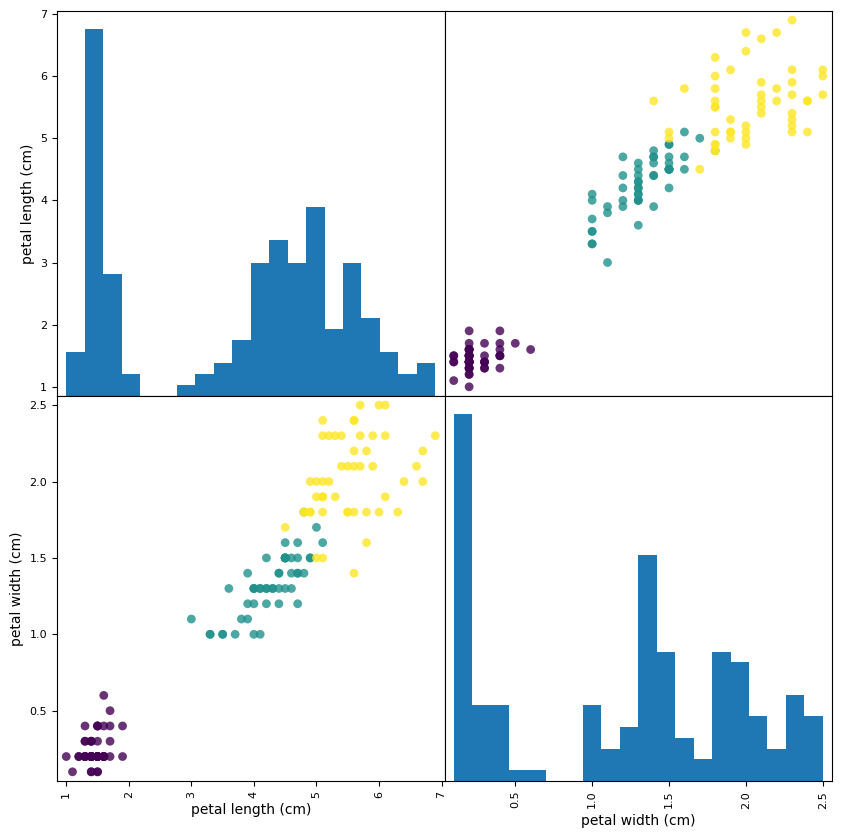

In [62]:
iris_dataframe_simple = pd.DataFrame(iris_dataset.data[:, 2:4], columns=iris_dataset.feature_names[2:4])
scat_mtrx = pd.plotting.scatter_matrix(iris_dataframe_simple, c=iris_dataset['target'], figsize=(10, 10), marker='o',
                                       hist_kwds={'bins': 20}, s=40, alpha=.8)

In [63]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(iris_dataset.data[:, 2:4], 
                                                    iris_dataset['target'],
                                                    random_state=0)

print(f'X_train shape: {x_train.shape}, y_train shape: {y_train.shape},\n'
      f'X_test shape: {x_test.shape}, y_test shape: {y_test.shape}')

X_train shape: (112, 2), y_train shape: (112,),
X_test shape: (38, 2), y_test shape: (38,)


In [72]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=10)

In [73]:
knn_model = knn.fit(x_train, y_train)

In [74]:
knn_predictions = knn.predict(x_test)
knn_predictions

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 2])

In [75]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, knn_predictions)
print(f'Accuracy: {accuracy}')

Accuracy: 0.9736842105263158


In [85]:
from sklearn.datasets import fetch_california_housing

dataset = fetch_california_housing()
data, target = dataset['data'], dataset['target']

x_train, x_test, y_train, y_test = train_test_split(data, 
                                                    target,
                                                    random_state=0)
x_train.shape

(15480, 8)

In [86]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=2)

In [87]:
knn_model = knn.fit(x_train, y_train)

In [89]:
knn_predictions = knn.predict(x_test)
knn_predictions

array([1.634 , 2.8165, 2.605 , ..., 1.5925, 2.688 , 2.3165])

In [90]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, knn_predictions)
print(f'MAE: {accuracy}')

MAE: 0.9736842105263158


## Линейная регрессия

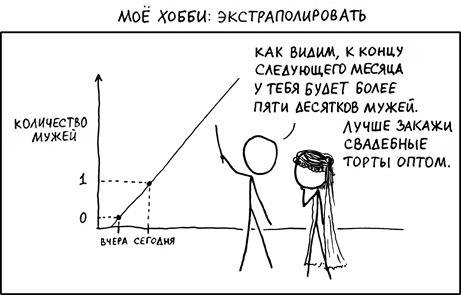

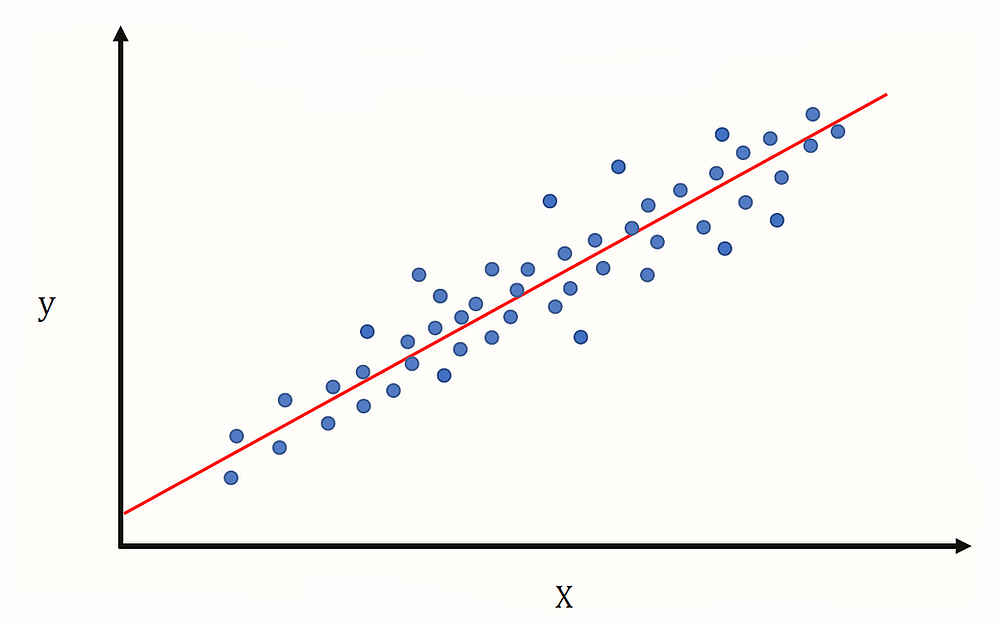

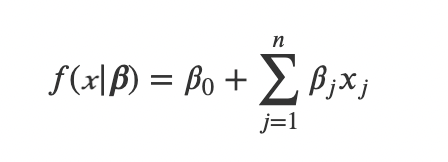

Другими словами можем переписать в векторном виде как:

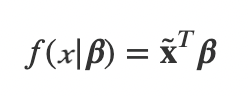

Решение данной задачи - коэф. линейной функции, то есть:

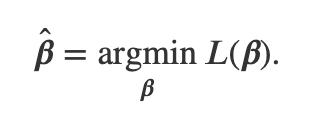

Для того, чтобы оценить решение можно расммотреть среднюю квадратичную ошибку:

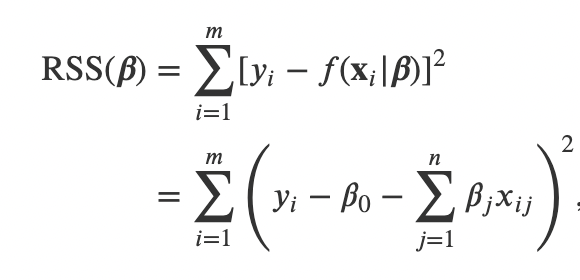

Опять же в векторном формате это выглядит так:

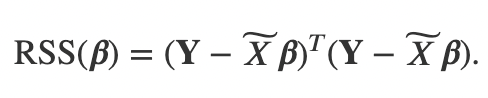

Использую стандартный метод нахождения минимума функции через производную получаем:

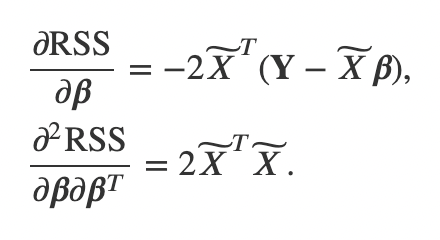

Ну и предполагая, что решение полноранговое, можем найти минимум функции ошибки в виде:

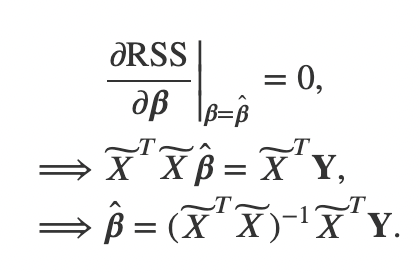

#### Регуляризация

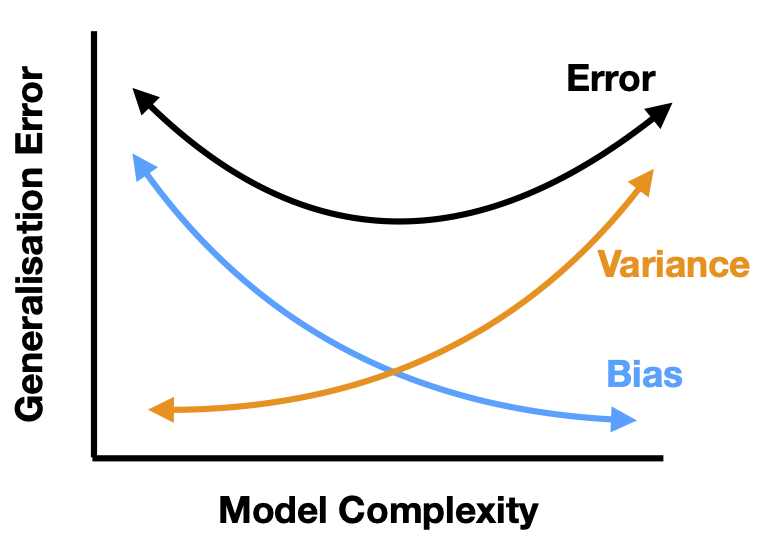

Можно занулить некоторые фичи:

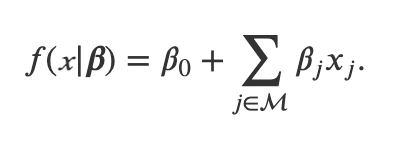

Однако более распространненая альтернатива работает лучше и менее затратная:

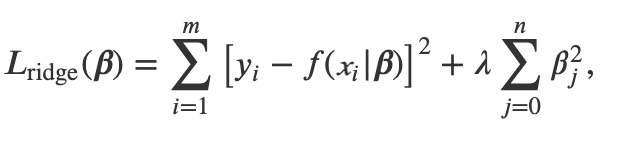

По аналогии выводим решение для этой функции:

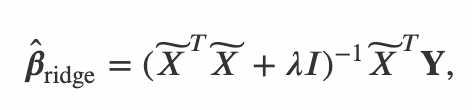

Еще можно вот так :) :

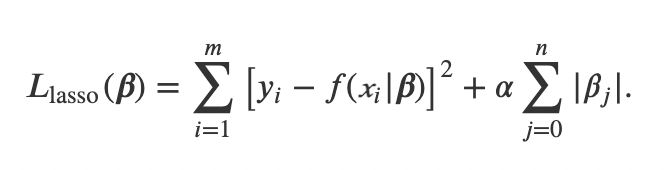

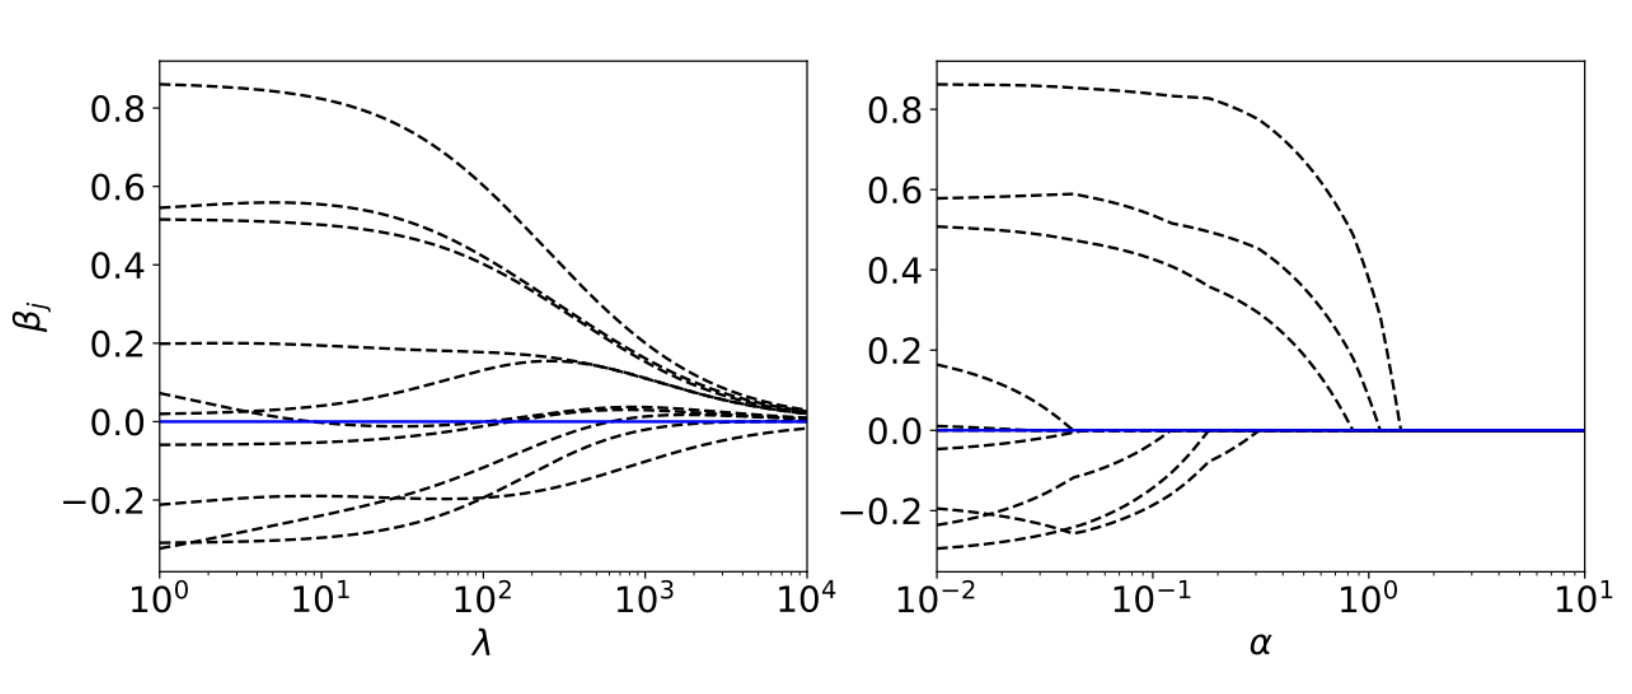

In [91]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
m1 = LinearRegression()
m2 = Ridge()
m3 = Lasso()

In [92]:
m1 = m1.fit(x_train, y_train)
m2 = m2.fit(x_train, y_train)
m3 = m3.fit(x_train, y_train)

mean_absolute_error(y_test, m1.predict(x_test)), mean_absolute_error(y_test, m2.predict(x_test)), mean_absolute_error(y_test, m3.predict(x_test))

(0.5368950735045295, 0.5369060034129516, 0.7687270988960112)

## SVM

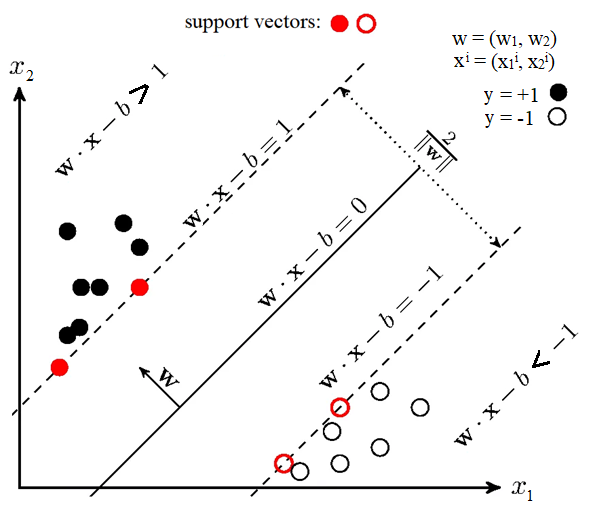

Вот это плоскость:

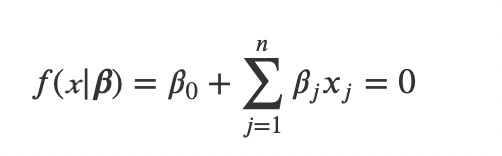

Рассмотрим функцию знака

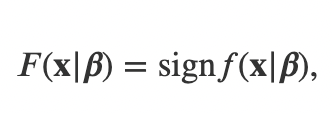

Введем понятие отступа для модели:

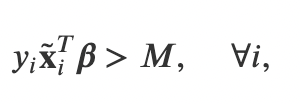

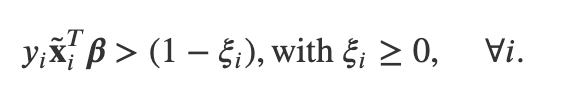

Нам по факту надо решить вот такую фигню:

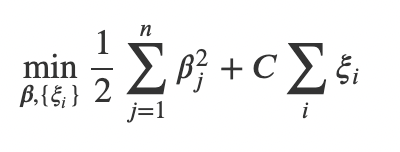

Далее сложно и уныло, поэтому вот ссылка на хабр где разбирают алгоритм подробнее: https://habr.com/ru/companies/ods/articles/484148/

In [23]:
from sklearn.svm import SVR
model = SVR()

In [24]:
model = model.fit(x_train, y_train)

mean_absolute_error(y_test, model.predict(x_test))

0.8667949469739722

### Логистическая регрессия

Решает задачу классификации и первом делом необходимо преминить one hot encoding к таргетам:

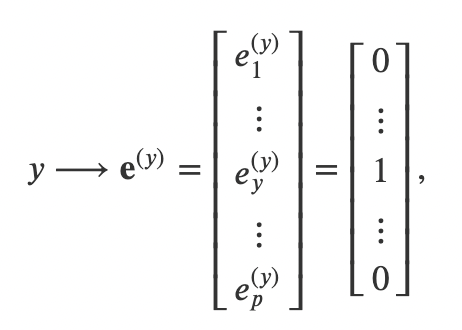

В этом случае решение для линейной регрессии перепишется в виде:

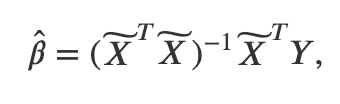

Ответ модели можно получить в с помощью, например функции argmax:

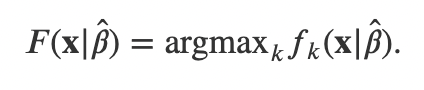

Однако для получения вероятностей в выходном слое необходимо применить функцию softmax:

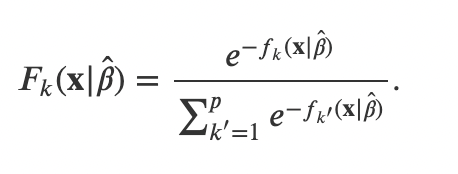

In [25]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

### Деревья решений

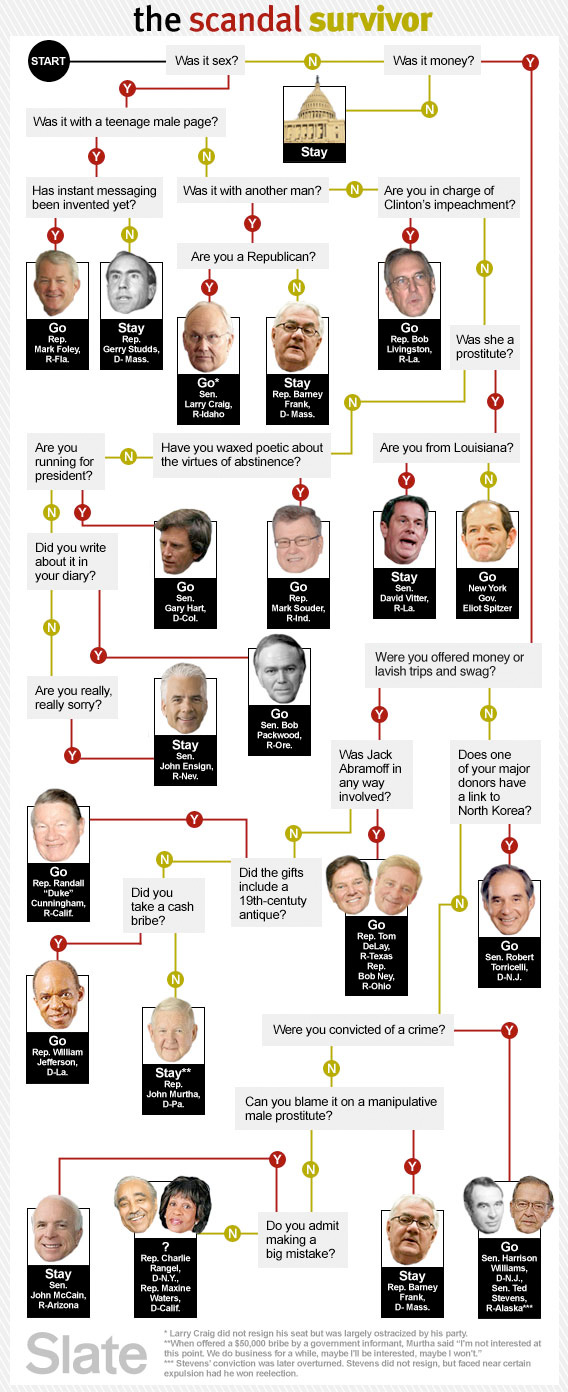

Для начала вспомним про функцию энтропию:

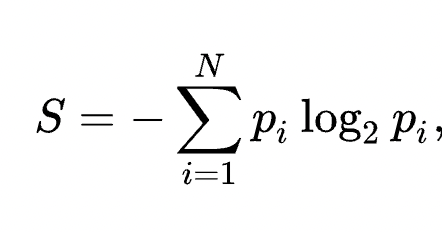

И определим прирост информации как:

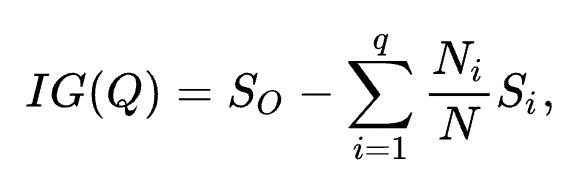

Тогда после каждого разделения по фиче можно получить эту характеристику и подсчитать эффективность разбиение деревом решения на каждом уровне:

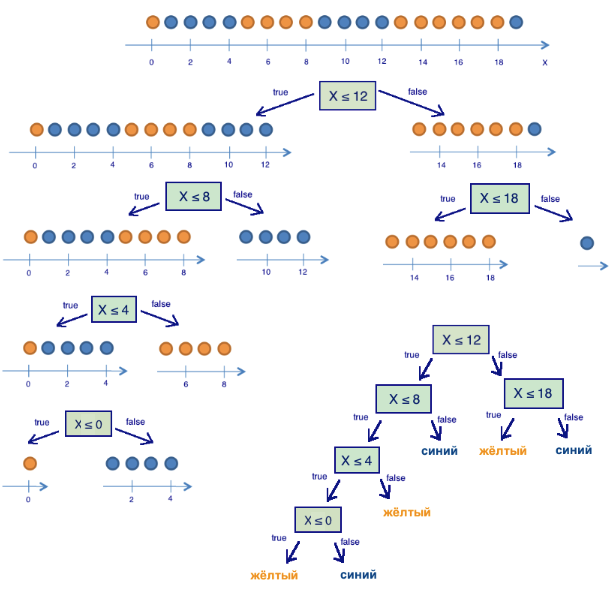

Вкратце алгоритм построения дерева выглядит так:

In [ ]:
def build(L):
    create node t
    if the stopping criterion is True:
        assign a predictive model to t
    else:
        Find the best binary split L = L_left + L_right
        t.left = build(L_left)
        t.right = build(L_right)
    return t  

Вместо энтропии можно использовать критерий джинни:

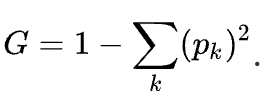

Или ошибку классификации:

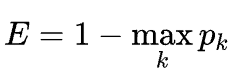

Но по факту это все разные интерпритации одной фигни:

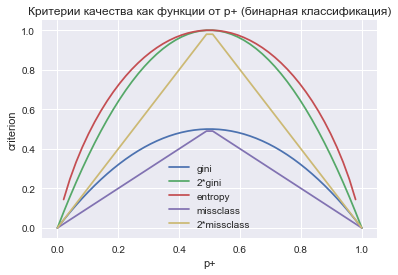

In [97]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor(max_depth=5)

In [98]:
model = model.fit(x_train, y_train)

mean_absolute_error(y_test, model.predict(x_test))

0.5364272485273119

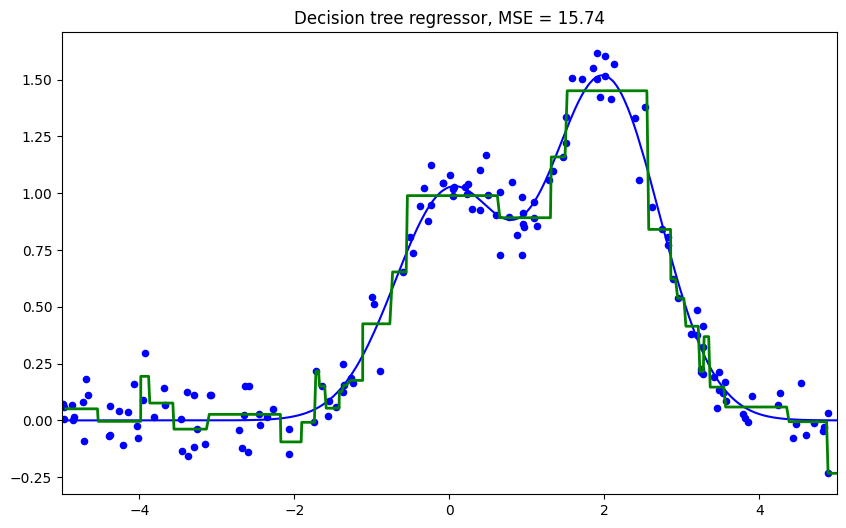

In [47]:
import matplotlib.pyplot as plt
import numpy as np

n_train = 150 
n_test = 1000       
noise = 0.1

def f(x):
    x = x.ravel()
    return np.exp(-x ** 2) + 1.5 * np.exp(-(x - 2) ** 2)

def generate(n_samples, noise):
    X = np.random.rand(n_samples) * 10 - 5
    X = np.sort(X).ravel()
    y = np.exp(-X ** 2) + 1.5 * np.exp(-(X - 2) ** 2) + \
    np.random.normal(0.0, noise, n_samples)
    X = X.reshape((n_samples, 1))
    return X, y

X_train, y_train = generate(n_samples=n_train, noise=noise)
X_test, y_test = generate(n_samples=n_test, noise=noise)

from sklearn.tree import DecisionTreeRegressor

reg_tree = DecisionTreeRegressor(max_depth=5, random_state=17)

reg_tree.fit(X_train, y_train)
reg_tree_pred = reg_tree.predict(X_test)

plt.figure(figsize=(10, 6))
plt.plot(X_test, f(X_test), "b")
plt.scatter(X_train, y_train, c="b", s=20)
plt.plot(X_test, reg_tree_pred, "g", lw=2)
plt.xlim([-5, 5])
plt.title("Decision tree regressor, MSE = %.2f" % np.sum((y_test - reg_tree_pred) ** 2))
plt.show()

# Code time


In [99]:
from sklearn import datasets
from sklearn.metrics import mean_squared_error

X, y = datasets.load_diabetes(return_X_y=True)

In [100]:
X = X[:,2].reshape((len(y),1))
y = y.reshape((len(y),1))

In [101]:
X = X[:-100]
X_test = X[-100:]

y = y[:-100]
y_test = y[-100:]
m = len(y)

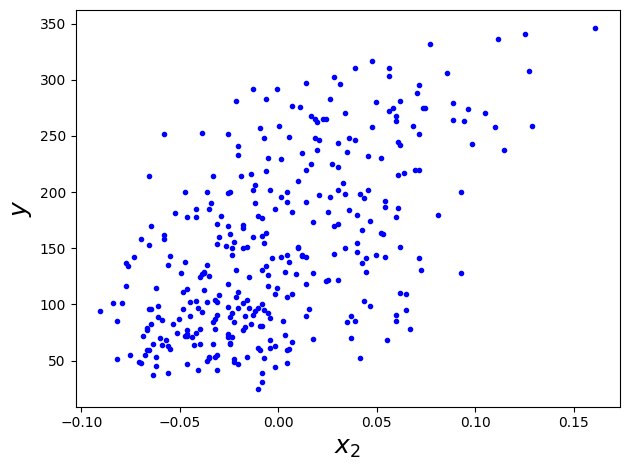

In [102]:
plt.plot(X, y, "b.")
plt.xlabel("$x_2$", fontsize=18)
plt.ylabel("$y$", fontsize=18)
plt.tight_layout()
plt.show()

Вcпоминаем решение линейной регрессии:

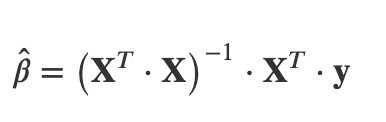

In [103]:
X_b = np.c_[np.ones((m, 1)), X]

In [109]:
beta = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [110]:
print("beta_0 = %s" % beta[0][0])
print("beta_1 = %s" % beta[1][0])

beta_0 = 152.27671846254722
beta_1 = 953.360627200204


In [111]:
y_predict = X_b.dot(beta)

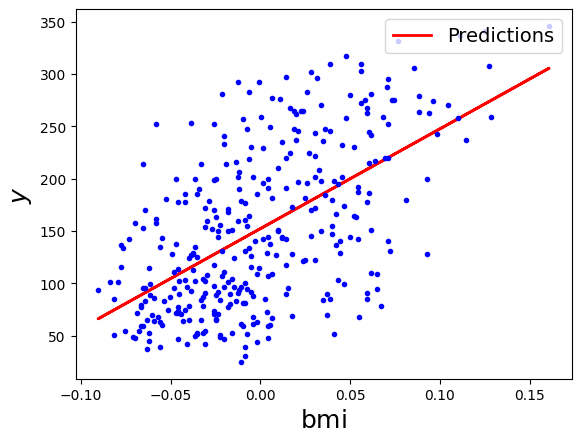

In [112]:
plt.plot(X, y_predict, "r-", linewidth=2, label="Predictions")
plt.plot(X, y, "b.")
plt.xlabel("$\mathrm{bmi}$", fontsize=18)
plt.ylabel("$y$", fontsize=18)
plt.legend(loc="upper right", fontsize=14)
plt.show()

Попробуем использовать градиентный спуск для решения задачи линейной регресией:

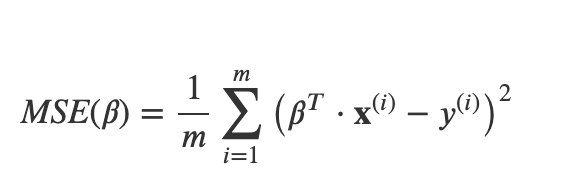

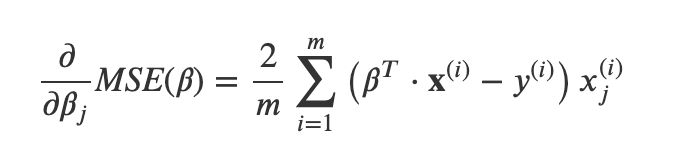

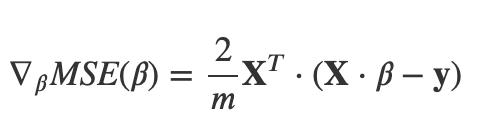

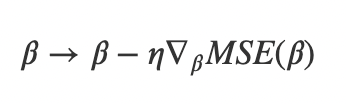

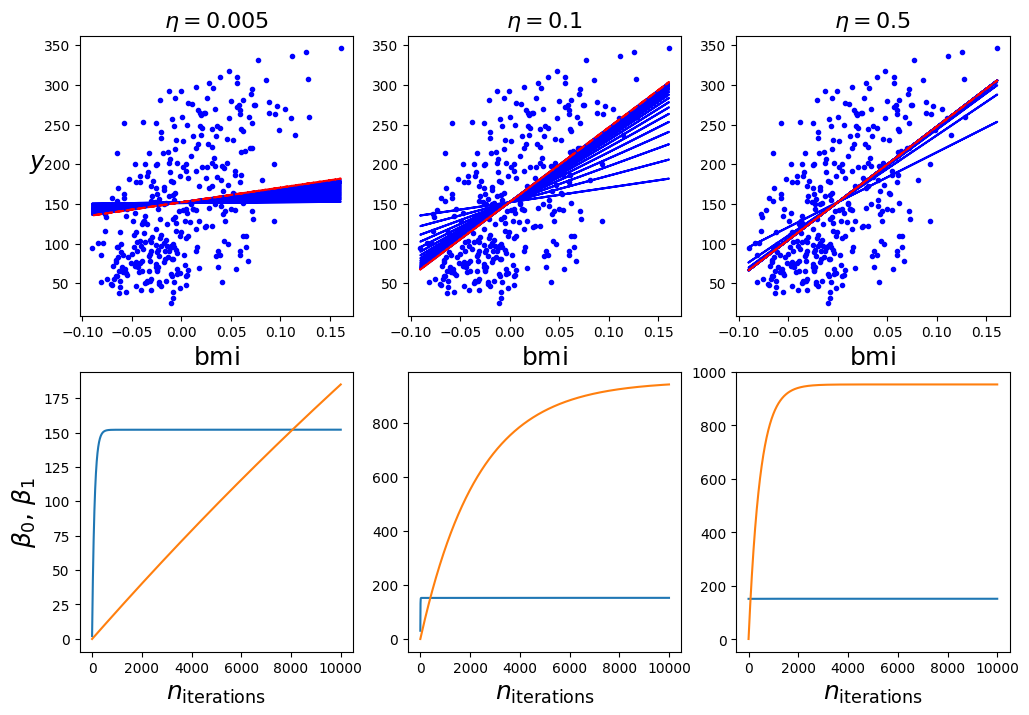

In [58]:
eta = 0.25
n_iterations = 10000
beta = np.random.randn(2,1)   # let's start with random values

def plot_gradient_descent(beta, eta):
    plt.plot(X, y, "b.")
    n_iterations = 10000
    betas = []
    
    for iteration in range(n_iterations):
        if iteration%500 == 0 and iteration >0:
            y_predict = X_b.dot(beta)
            style = "b-" 
            plt.plot(X, y_predict, style)
        gradients = 2/m * X_b.T.dot(X_b.dot(beta) - y)
        beta = beta - eta * gradients
        betas.append(beta)
        
    y_predict = X_b.dot(beta)
    style = "r--"
    plt.plot(X, y_predict, style)
    plt.xlabel("$\mathrm{bmi}$", fontsize=18)
    
    plt.title(r"$\eta = {}$".format(eta), fontsize=16)
    return betas

np.random.seed(42)
beta = np.random.randn(2,1)

plt.figure(figsize=(12,8))
plt.subplot(231)
plt.ylabel("$y$", rotation=0, fontsize=18)
predictions_005 = plot_gradient_descent(beta, eta=0.005)
plt.subplot(232)
predictions_100 = plot_gradient_descent(beta, eta=0.1)
plt.subplot(233)
predictions_500 = plot_gradient_descent(beta, eta=0.5)
plt.subplot(234)

plt.xlabel("$n_{\mathrm{iterations}}$", fontsize=18)
plt.ylabel("$\\beta_0$, $\\beta_1$", fontsize=18)
plt.plot([i[0] for i in predictions_005])
plt.plot([i[1] for i in predictions_005])
plt.subplot(235)

plt.xlabel("$n_{\mathrm{iterations}}$", fontsize=18)
plt.plot([i[0] for i in predictions_100])
plt.plot([i[1] for i in predictions_100])
plt.subplot(236)

plt.xlabel("$n_{\mathrm{iterations}}$", fontsize=18)
plt.plot([i[0] for i in predictions_500])
plt.plot([i[1] for i in predictions_500])
plt.show()

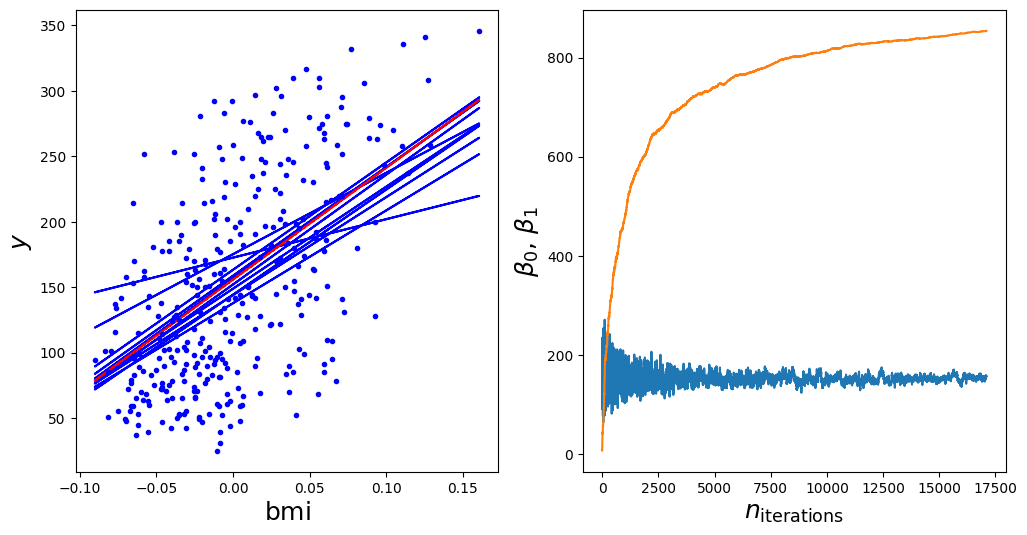

In [59]:
beta = np.random.randn(2,1)
n_epochs = 50

t0, t1 = 150, 500  
def learning_schedule(t):
    return t0 / (t + t1)

betas = []

plt.figure(figsize=(12,6))
plt.subplot(121)

for epoch in range(n_epochs):
    for i in range(m): 
        random_index = np.random.randint(m)     
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(beta) - yi)
        eta = learning_schedule(epoch * m + i)
        beta = beta - eta * gradients
        betas.append(beta)

    
    if epoch%5 == 0:
        y_predict = X_b.dot(beta)
        style = "b-" 
        plt.plot(X, y_predict, style)
            

y_predict = X_b.dot(beta)
style = "r--"
plt.plot(X, y_predict, style)
plt.plot(X, y, "b.")
plt.xlabel("$\mathrm{bmi}$", fontsize=18)
plt.ylabel("$y$", fontsize=18)

plt.subplot(122)
plt.plot([i[0] for i in betas])
plt.plot([i[1] for i in betas])

plt.xlabel("$n_{\mathrm{iterations}}$", fontsize=18)
plt.ylabel("$\\beta_0$, $\\beta_1$", fontsize=18)
plt.show()